# Mall Customer Segmentation

## About Dataset

Mall Customer Data is a comprehensive dataset that provides a detailed analysis of a hypothetical mall's ideal customers. By collecting and analyzing customer data through membership cards, this dataset provides valuable insights that can help a business better understand its customers.

The dataset includes 200 records and 5 columns, providing a wealth of information about the mall's customer base. Each column represents a specific aspect of the customer's profile, including their unique Customer ID, Gender, Age, Annual Income and Spending Score.

By analyzing this data, businesses can gain valuable insights into their customers' preferences, behaviors, and purchasing habits. For example, they can segment customers by age, income, or gender to better understand how these factors impact their purchasing decisions.

## Data Dictionary

**Customer ID**

* Numerical
* It is a unique identifier for each customer.

**Gender**

* Categorical
* The gender of the customer, either **Male** or **Female**. Gender can be used to analyze purchasing behavior and preferences between genders.

**Age**
* Numerical
* The age of the customer, usually measured in years. Age can be used to segment customers into different age groups, which can help identify purchasing patterns and preferences among different age groups.

**Income**
* Numerical
* The annual income of the customer, usually measured in dollars or another currency. Annual income can be used to segment customers into different income groups, which can help identify purchasing patterns and preferences among different income levels.

**Spending Score**
* Numerical
* A score assigned by the shop based on the customer's behavior and spending nature. This score can be used to segment customers based on their purchasing patterns, such as high-spending customers, low-spending customers, and customers who are likely to make impulse purchases.

## Problem Statement

* Conduct an in-depth Exploratory Data Analysis on a dataset, uncovering insights, patterns, and relationships within the data.
* Create a profile for different groups(or clusters) of customers those are frequent in a particular shop.

In [ ]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

## Reading dataset and getting an idea what it contains

In [ ]:
import os
folder_path = "drive/MyDrive/Colab Notebooks/dscourse/data"
csv_path = os.path.join(folder_path, "Mall_Customers.csv")

In [ ]:
df = pd.read_csv(csv_path)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 200
Number of columns: 5


### Cleaning up column names for better handling

In [ ]:
cols_cleaned = []

for col in df.columns:
  cols_cleaned.append(col.split("(")[0].strip().replace(" ", "_"))

df.columns = cols_cleaned

#Sanity check
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### Missing Value Detection

Missing value detection is essential to chack the quality of the data. If present impute it with proper value so that quality of the data is maintained for robust statistical analysis.

In [ ]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

* No missing value present

#### Duplicate Row Detection

Detecting duplicate rows and removing them is vital for ensuring quality of data, integrity, accuracy and performance.

In [ ]:
print(f"Number of duplicate rows: {df[df.duplicated()].shape[0]}")

Number of duplicate rows: 0


#### Remove Unnecessary Columns

Removing unnecessary columns helps in reducing noise, optimizing resources and enhance quality and clarity of data.

Here CustomerID column is not needed for EDA or modeling, so it should be removed.

In [ ]:
df.drop("CustomerID", axis=1, inplace=True)

In [ ]:
# Sanity check
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Checking Data Types
By checking datatype of each column we can identify the categorical and numerical columns present in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual_Income   200 non-null    int64 
 3   Spending_Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
num_columns = []
cat_columns = []

for col in df.columns:
  if df[col].dtype == 'object':
    cat_columns.append(col)
  else:
    num_columns.append(col)

print(f"Number of categorical columns: {len(cat_columns)}")
print(f"Categorical columns: {cat_columns}")
print("-" * 60)
print(f"Number of numerical columns: {len(num_columns)}")
print(f"Numerical columns: {num_columns}")

Number of categorical columns: 1
Categorical columns: ['Gender']
------------------------------------------------------------
Number of numerical columns: 3
Numerical columns: ['Age', 'Annual_Income', 'Spending_Score']


#### Distribution of Numeric Columns

Checking and visualizing the distribution of numeric columns is vital for understanding the underlying characteristics of the data such as central tendency, spread & variablity of data and also understand whether the data is symmetrically distributed or skewness is present in the data.

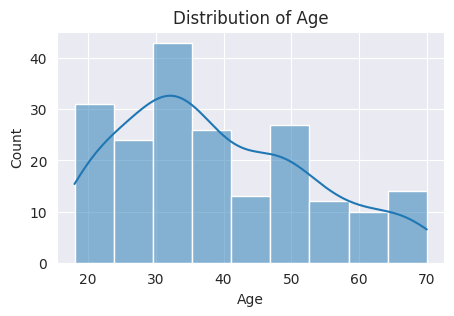

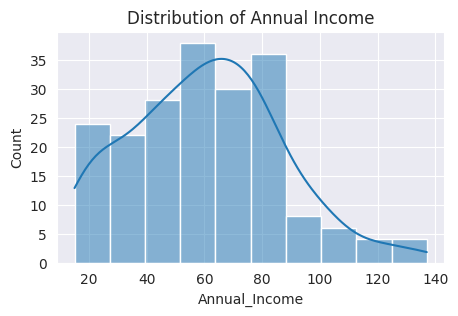

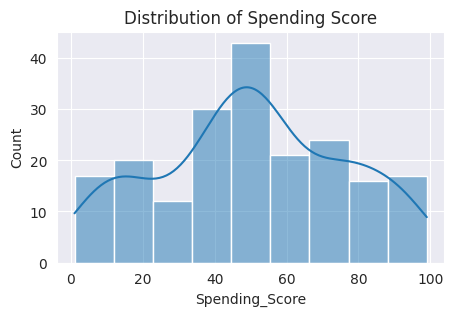

In [ ]:
for col in num_columns:
  fig, axes = plt.subplots(figsize=(5,3))
  sns.histplot(data= df, x = col, kde=True)
  axes.set_title(f"Distribution of {col.replace('_', ' ')}")

#### Overview of Categorical columns

It helps us to identify proportion of each category contributed to the sample.

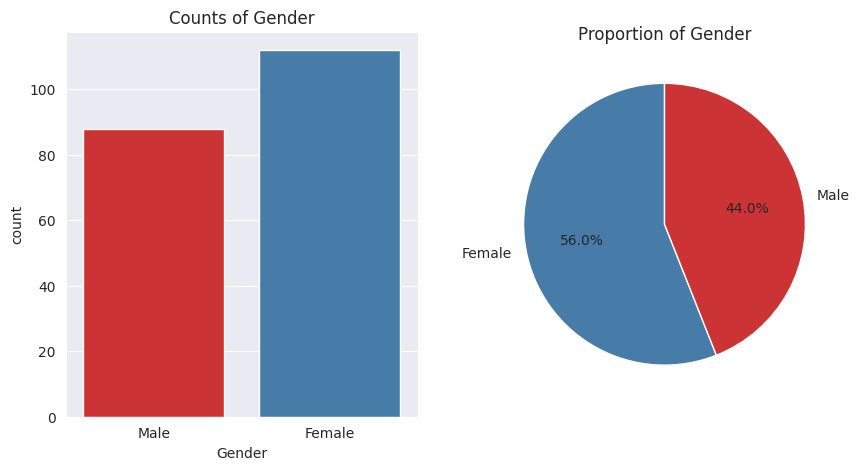

In [ ]:
for col in cat_columns:
  fig, axes = plt.subplots(nrows= 1, ncols=2, figsize=(10, 5))

  sns.countplot(ax=axes[0], data=df, x= col, hue= col, palette="Set1")
  axes[0].set_title(f"Counts of {col}")

  plt.pie(x= df[col].value_counts(), labels= df[col].value_counts().index, autopct="%1.1f%%", startangle=90, colors=["#477CA8", "#CB3335"])
  axes[1].set_title(f"Proportion of {col}")

## Data Preprocessing

Since most machine learning models work with numeric data, we need to convert categorical data into numeric values. One way to do this is by using the Label Encoder from the scikit-learn library, which assigns a unique numerical label to each category in a column.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df1 = df.copy()
for col in cat_columns:
  lc = LabelEncoder()
  df1[col] = lc.fit_transform(df[col])


In [ ]:
#Sanity check
df1.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Clustering

#### Data Preparation

Scaling features ensure that all features contribute equally to the cluster formation, leading to more meaningful and accurate clusters.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
scaled = sc.fit_transform(df1)
df_scaled = pd.DataFrame(scaled, columns= df1.columns)
df_scaled

,Gender,Age,Annual_Income,Spending_Score
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

#### Dendrogram Representation

Dendrogram representation is necessary for visualizing hierarchical clustering results, determining the optimal number of clusters.

In [ ]:
import scipy.cluster.hierarchy as sch

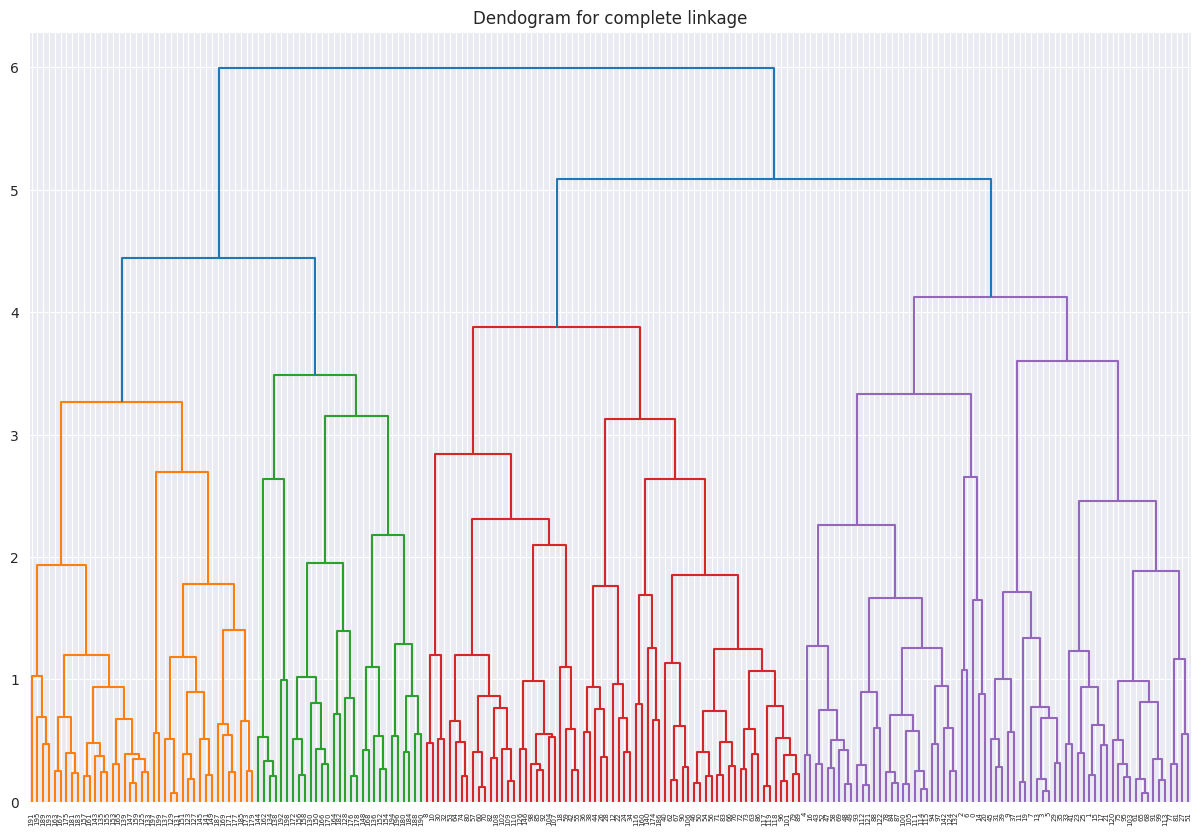

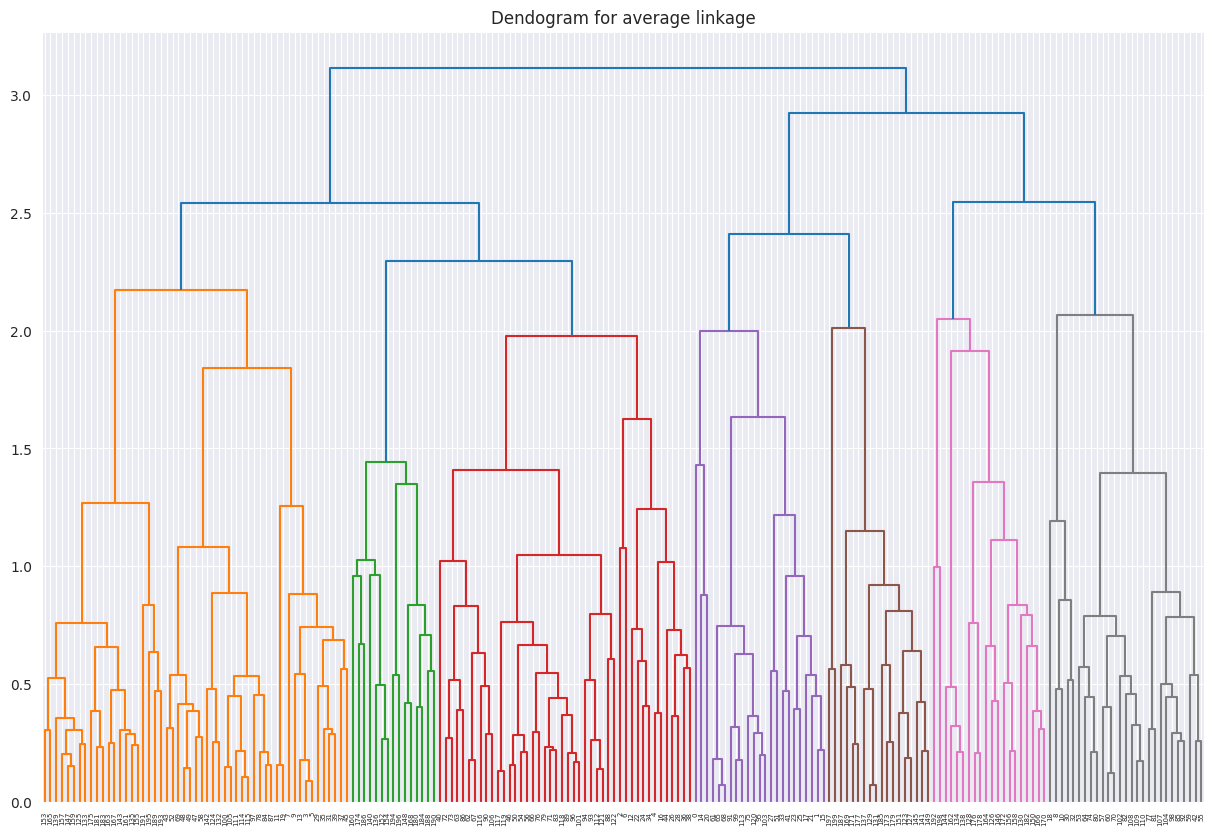

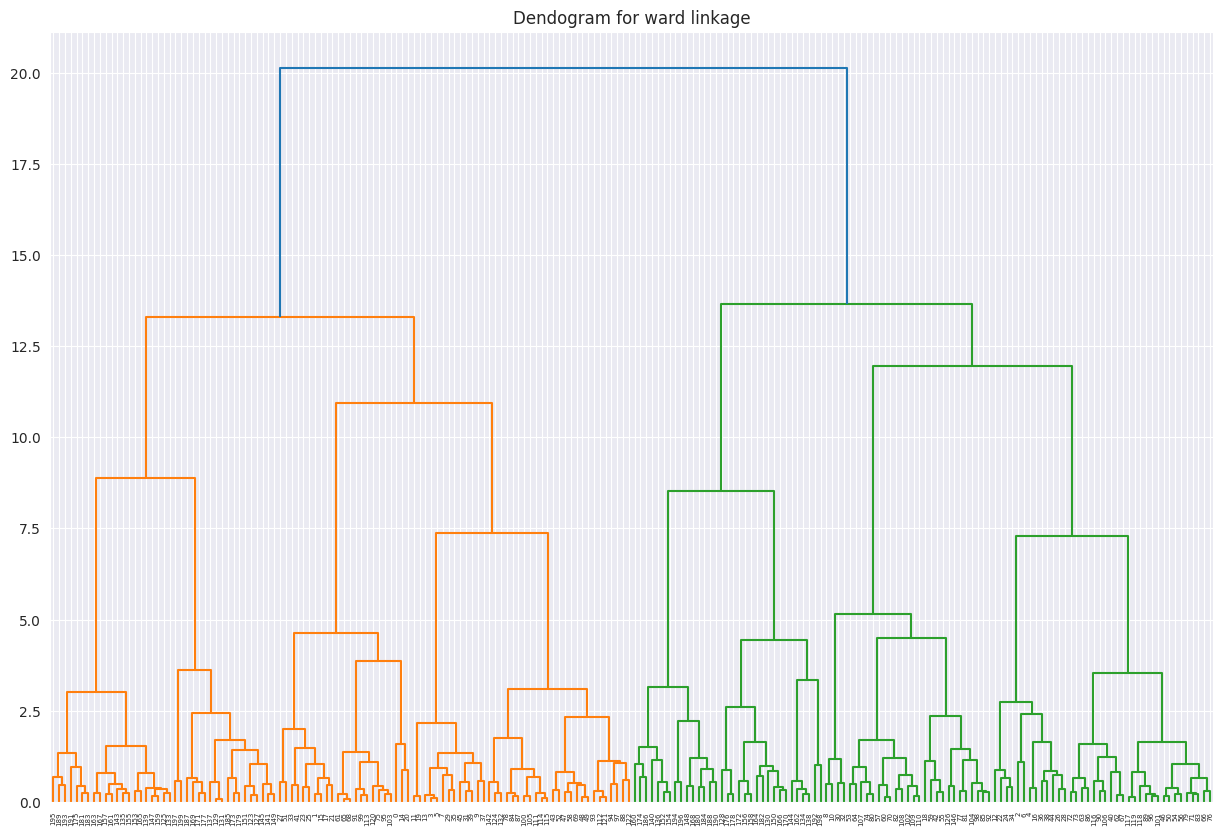

In [ ]:
for method in ["complete", "average", "ward"]:
  z= sch.linkage(df_scaled, method=method)
  plt.figure(figsize=(15, 10))
  sch.dendrogram(z)
  plt.title(f"Dendogram for {method} linkage")

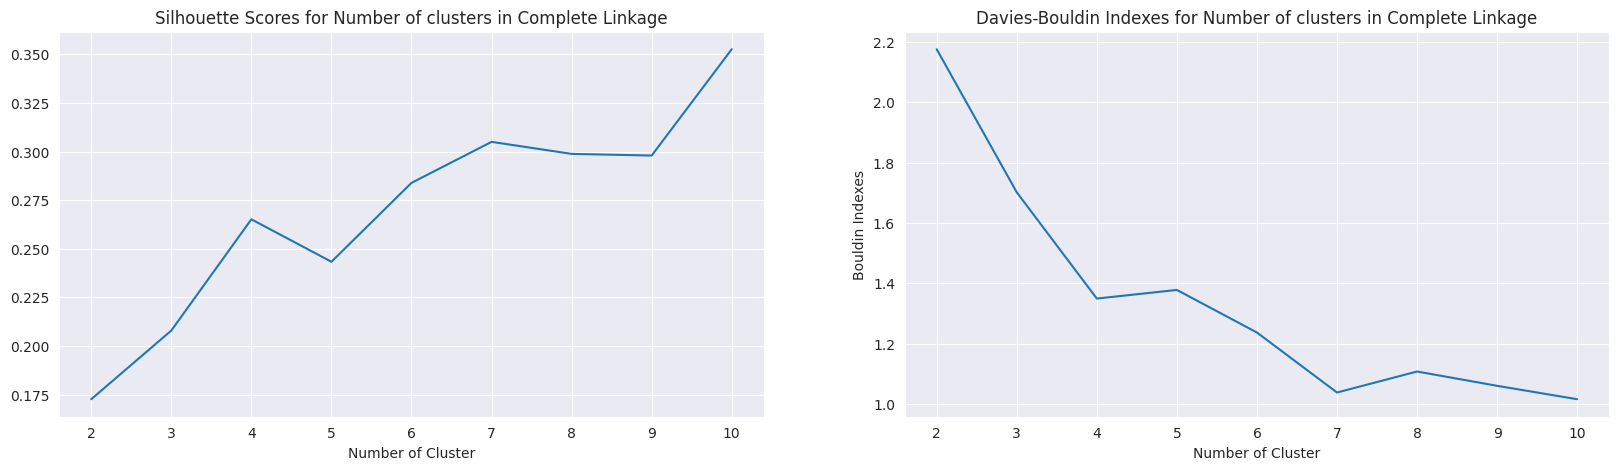

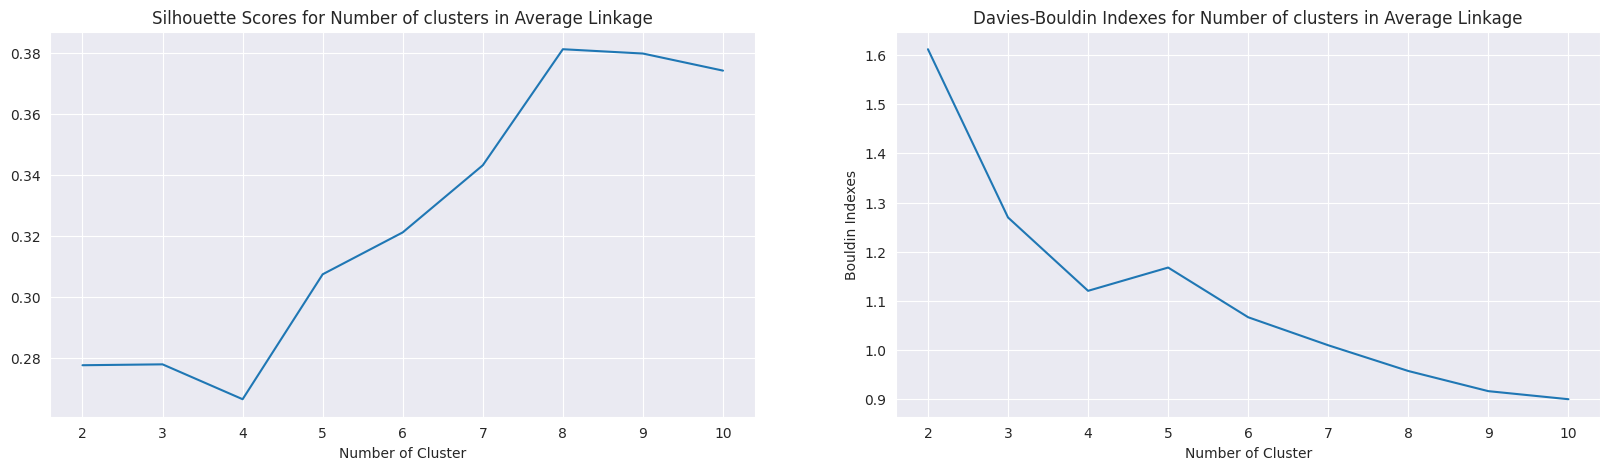

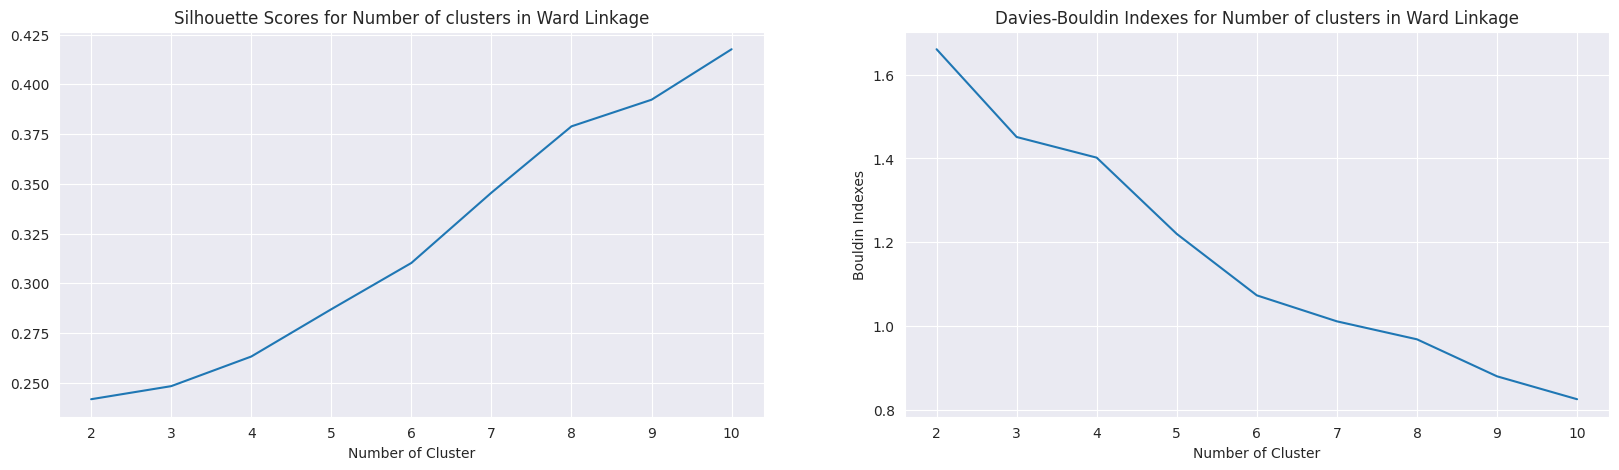

In [ ]:
# Find the most efficient linkage method and the number of clusters
for l in ["complete", 'average', 'ward']:
  n_clusters = range(2,11)
  s_scores = []
  db_indexes = []

  for c in n_clusters:
    ac = AgglomerativeClustering(n_clusters= c,
                                 metric="euclidean",
                                 linkage=l)
    labels = ac.fit_predict(df_scaled)

    # Find Silhouette Score
    ss = silhouette_score(df_scaled, labels)
    s_scores.append(ss)

    # Find Davies-Bouldin Index
    bi= davies_bouldin_score(df_scaled, labels)
    db_indexes.append(bi)

  # Plot silhouette score and bouldin index
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

  sns.lineplot(ax=axes[0], x= n_clusters, y= s_scores)
  axes[0].set_title(f"Silhouette Scores for Number of clusters in {l.title()} Linkage")
  axes[0].set_xlabel("Number of Cluster")
  axes[1].set_ylabel("Silhouette Score")

  sns.lineplot(ax=axes[1], x= n_clusters, y= db_indexes)
  axes[1].set_title(f"Davies-Bouldin Indexes for Number of clusters in {l.title()} Linkage")
  axes[1].set_xlabel("Number of Cluster")
  axes[1].set_ylabel("Bouldin Indexes")

### Observations

* From Dendrogram analysis for **complete**, **average** and **ward** linkage we found that in ward linkage clusters are most efficiently recognized.
* From Silhouette Score and Davies-Bouldin Index we found that Silhouette score is maximum for **10** clusters and Davies-Bouldin index is minimum for the same number of clusters.

**We will use Ward linkage for 10 clusters for our problem.**

In [ ]:
ac= AgglomerativeClustering(n_clusters= 10,
                            metric="euclidean",
                            linkage="ward")
labels = ac.fit_predict(df_scaled)
df['Cluster'] = labels

In [ ]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,9
3,Female,23,16,77,8
4,Female,31,17,40,9


In [ ]:
df["Cluster"].value_counts().sort_index()

Cluster
0    29
1    18
2    23
3    25
4    25
5    18
6    21
7    15
8    13
9    13
Name: count, dtype: int64

## Analyzing Characteristics of the identified clusters

#### Plot Categorical Features with each Cluster

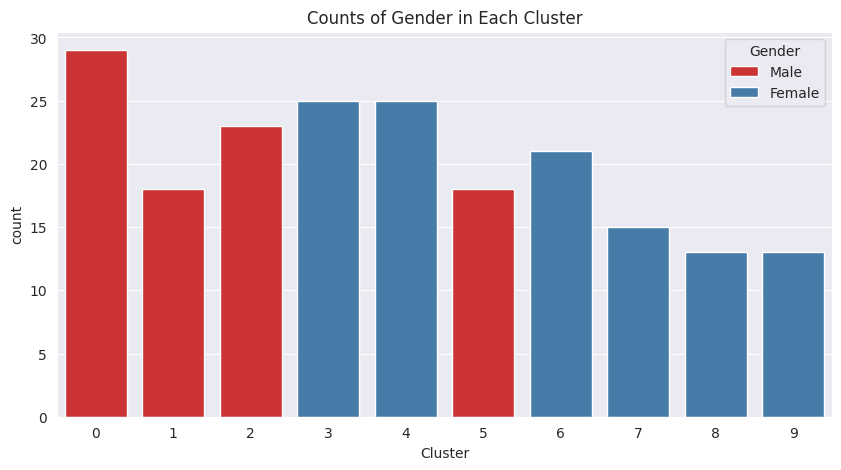

In [ ]:
for col in cat_columns:
  plt.figure(figsize=(10, 5))
  sns.countplot(data=df,
                x="Cluster",
                hue=col,
                order=sorted(df["Cluster"].unique()),
                palette="Set1")
  plt.title(f"Counts of {col.title()} in Each Cluster")

#### Distribution of Numerical Features with each Cluster

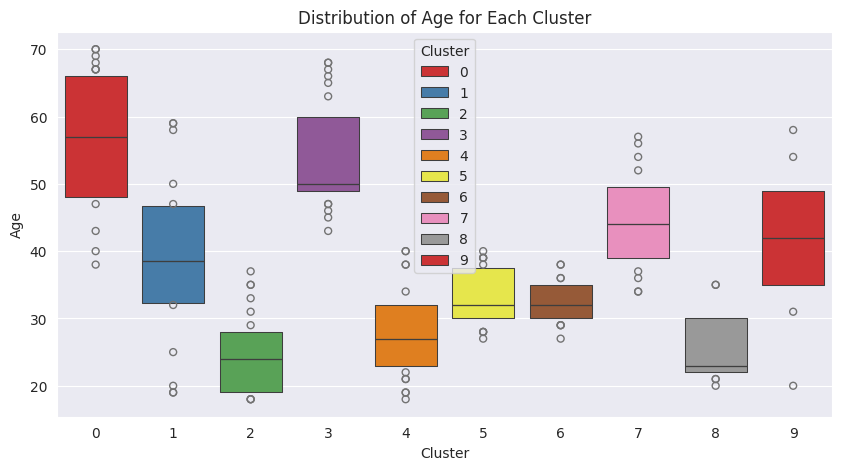

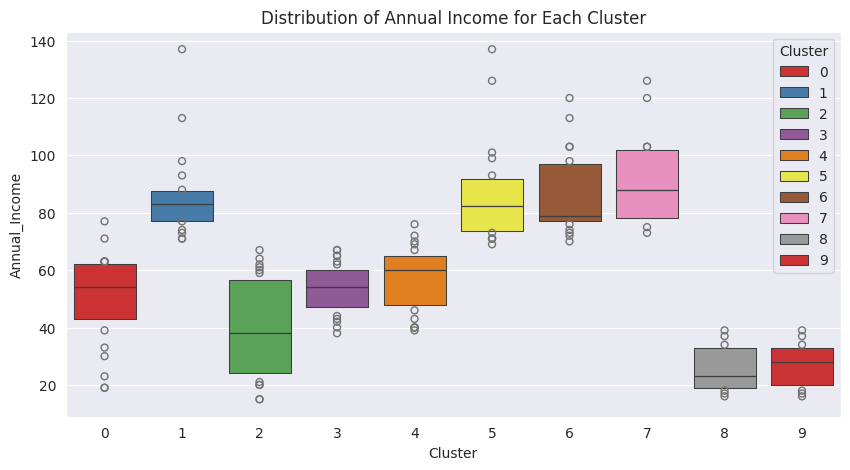

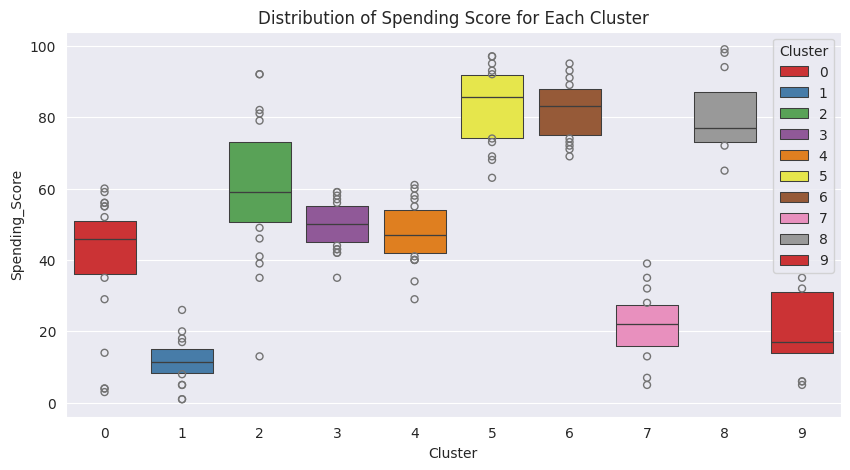

In [ ]:
for col in num_columns:
  plt.figure(figsize=(10, 5))
  sns.boxenplot(data= df,
                x="Cluster",
                y=col,
                hue="Cluster",
                order=sorted(df["Cluster"].unique()),
                palette="Set1")
  plt.title(f"Distribution of {col.replace('_', ' ')} for Each Cluster")

## Conclusions

**Cluster 0**

* Exclusively for men.
* 50- 65 age group people mostly present.
* 40- 60K income group people mostly present.
* 35- 50(1-100 scale) spending score people mostly present.

**In Short:** Aged men, having good income and average spending score.

**Cluster 1**

* Exclusively for men.
* 32- 45 age group people mostly present.
* 80- 90K income group people mostly present.
* 10- 15(1-100 scale) spending score people mostly present.

**In Short:** Middle aged men, having high income and lowest spending score.


**Cluster 2**

* Exclusively for men.
* 18- 28 age group people mostly present.
* 25- 55K income group people mostly present.
* 50- 70(1-100 scale) spending score people mostly present.

**In Short:** Very young men, having average income and abobe average spending score.


**Cluster 3**

* Exclusively for women.
* 50- 60 age group people mostly present.
* 50- 60K income group people mostly present.
* 40- 55(1-100 scale) spending score people mostly present.

**In Short:** Aged women, having good income and average spending score.

**Cluster 4**

* Exclusively for women.
* 22- 32 age group people mostly present.
* 50- 65K income group people mostly present.
* 32- 55(1-100 scale) spending score people mostly present.

**In Short:** Young women, having good income and average spending score.

**Cluster 5**

* Exclusively for men.
* 30- 40 age group people mostly present.
* 70- 90K income group people mostly present.
* 75- 90(1-100 scale) spending score people mostly present.

**In Short:** Middle aged men, having high income and high spending score.

**Cluster 6**

* Exclusively for women.
* 30- 35 age group people mostly present.
* 75- 95K income group people mostly present.
* 75- 85(1-100 scale) spending score people mostly present.

**In Short:** Middle aged women, having high income and highest spending score.

**Cluster 7**

* Exclusively for women.
* 40- 50 age group people mostly present.
* 80- 100K income group people mostly present.
* 15- 30(1-100 scale) spending score people mostly present.

**In Short:** Middle aged women, having high income and lowest spending score.

**Cluster 8**

* Exclusively for women.
* 20- 30 age group people mostly present.
* 20- 35K income group people mostly present.
* 75- 85(1-100 scale) spending score people mostly present.

**In Short:** Young women, having low income and high spending score.

**Cluster 9**

* Exclusively for women.
* 35- 50 age group people mostly present.
* 20- 35K income group people mostly present.
* 15- 30(1-100 scale) spending score people mostly present.

**In Short:** Middle aged women, having low income and low spending score.